<a href="https://colab.research.google.com/github/mariahjackson91/sales-predictions/blob/main/Copy_of_Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
filename = '/content/drive/MyDrive/Coding Dojo- Data Science/01 Week 1: Python/sales_predictions.csv'

In [ ]:
# Load the Data
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
# no duplicates
df.duplicated().sum()

0

In [ ]:
# no duplicates to drop but just in case
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
# Check for duplicates
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
# Check columns, rows, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [ ]:
# identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# drop item weight & outlet size due to insignificance
df.dropna(inplace=True)

In [ ]:
# check to ensure there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489
std,4.670973,0.044607,62.420534,7.388800,1497.964740
min,4.555000,0.000000,31.490000,1987.000000,69.243200
25%,8.770000,0.025968,94.409400,1997.000000,1125.202000
50%,12.650000,0.049655,142.979900,1999.000000,1939.808300
75%,17.000000,0.088736,186.614150,2004.000000,3111.616300
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


In [ ]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Standardize the values in the Item_Fat_Content column
df['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'reg' : 'Regular', 'low fat' : 'Low Fat'}, inplace= True)

In [ ]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

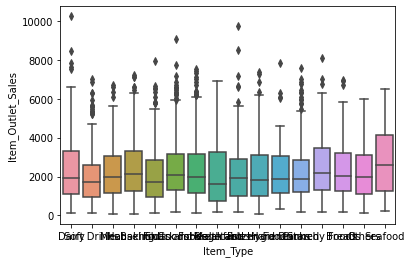

In [ ]:
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)



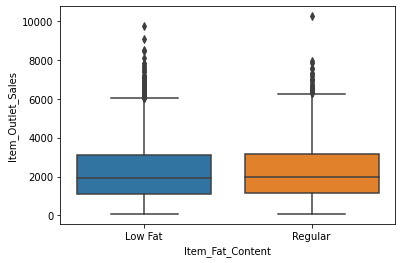

In [ ]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

In [ ]:
df['Item_Outlet_Sales'].head()

0    3735.1380
1     443.4228
2    2097.2700
4     994.7052
5     556.6088
Name: Item_Outlet_Sales, dtype: float64

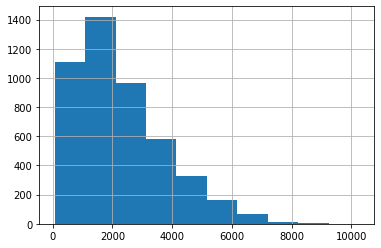

In [ ]:
df['Item_Outlet_Sales'].hist()

In [ ]:
df['Item_Weight'].head()

0     9.300
1     5.920
2    17.500
4     8.930
5    10.395
Name: Item_Weight, dtype: float64

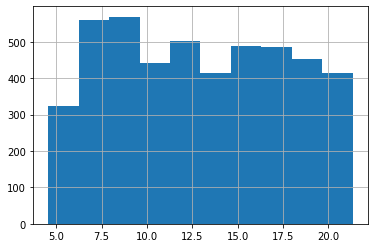

In [ ]:
df['Item_Weight'].hist()

In [ ]:
corr = df.corr()

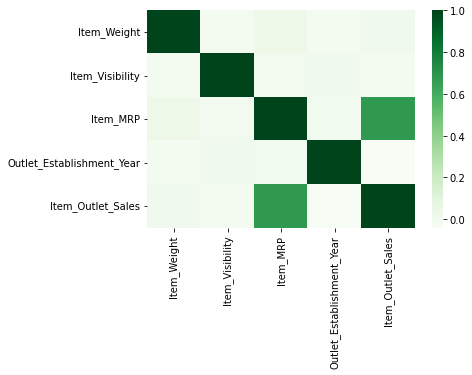

In [ ]:
sns.heatmap(corr, cmap = 'Greens')

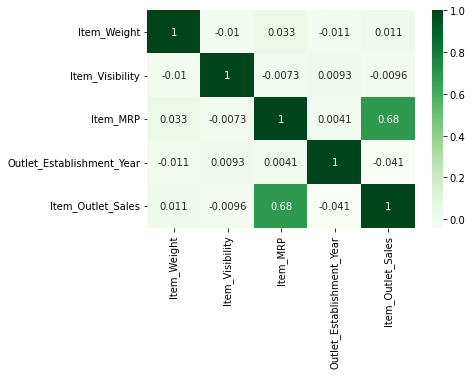

In [ ]:
sns.heatmap(corr, cmap = 'Greens', annot = True)